In [1]:
from lightgbm import LGBMRegressor, plot_importance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import f_regression, SelectKBest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [2]:
train = pd.read_parquet('C:/Users/USER/Desktop/Bbeojung.kr/Data/final_dataset/train_2000.parquet')
test = pd.read_parquet('C:/Users/USER/Desktop/Bbeojung.kr/Data/final_dataset/test_2000.parquet')

In [3]:
cols = ['bstop', 'bus', 'month', 'weekday', 'how', 'when', 'num', 
           'bstop_bus',
         'bstop_month', 
        'bstop_weekday', 
        'bstop_when',  
       'bus_month',   'bus_weekday',
         'bus_when', 
        'month_weekday', 
        'month_when',  
       'weekday_when',  
       'bstop_bus_month',  
       'bstop_bus_weekday',  
       'bstop_bus_when',  
       'bstop_month_weekday', 
        'bstop_month_when', 
        'bstop_weekday_when', 
        'bus_month_weekday', 
        'bus_month_when', 
        'bus_weekday_when', 
        'month_weekday_when', 
        'bstop_bus_month_weekday',
       'bstop_bus_month_when', 
        'bstop_bus_weekday_when',
       'bstop_month_weekday_when', 
        'bus_month_weekday_when',
       'bstop_bus_month_weekday_when']
       
num_col = list(set(train.columns) - set(cols))

In [16]:
test_df.isna().sum()

mean_weekday_when               0
mean_bstop_weekday_when    256320
sum_bstop                    6360
sum_bstop_month_weekday      6360
mean_bus_weekday                0
                            ...  
mean_bus_when                 348
sum_bstop_when             256320
mean_bus_weekday_when         348
mean_when                       0
mean_bstop_when            256320
Length: 62, dtype: int64

In [4]:
train_df = train[num_col]
test_df = test[num_col]

In [5]:
def split_xy(df):
    return df.iloc[:, :-1], df.iloc[:, -1]

x_train, y_train = split_xy(train_df)
x_test, y_test = split_xy(test_df)    

In [ ]:
# target(Price)와 가장 correlated 된 features 를 k개 고르기.

## selctor 정의하기.
selector = SelectKBest(score_func=f_regression, k=20)
## 학습데이터에 fit_transform 
X_train_selected = selector.fit_transform(x_train, y_train)
## 테스트 데이터는 transform
X_test_selected = selector.transform(x_test)
X_train_selected.shape, X_test_selected.shape

In [10]:
# By compare_model.ipynb
params = {
    'bagging_fraction' : 0.5,
    'bagging_freq' : 0,
    'boosting_type' : 'gbdt',
    'class_weight' : None,
    'colsample_bytree' : 1.0,
    'feature_fraction' : 0.9,
    'importance_type' : 'split',
    'learning_rate' : 0.2,
    'max_depth' : -1,
    'min_child_samples' : 76,
    'min_child_weight' : 0.001,
    'min_split_gain' : 0.5,
    'n_estimators' : 210,
    'n_jobs' : -1,
    'num_leaves' : 150,
    'objective' : None,
    'random_state' : 123,
    'reg_alpha' : 0.005,
    'reg_lambda' : 0.0005,
    'silent' : 'warn',
    'subsample' : 1.0,
    'subsample_for_bin' : 200000,
    'subsample_freq' : 0
}

In [44]:
MAE =  mean_absolute_error(y_test.fillna(0), y_pred)
MSE = mean_squared_error(y_test.fillna(0), y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test.fillna(0), y_pred)

print(f'MAE : {MAE}', f'MSE : {MSE}', f'RMSE : {RMSE}', f'R2 : {R2}', sep='\n')

MAE : 0.005624264525730398
MSE : 0.10552848310036217
RMSE : 0.32485147852574436
R2 : 0.9985959619876319


In [22]:
lgbm = LGBMRegressor(**params)
lgbm.fit(x_train, y_train, eval_metric='mae')
y_pred = lgbm.predict(x_test.fillna('0'))

MAE =  mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

print(f'MAE : {MAE}', f'MSE : {MSE}', f'RMSE : {RMSE}', f'R2 : {R2}', sep='\n')

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in the following fields: mean_bstop_weekday_when, sum_bstop, sum_bstop_month_weekday, mean_bstop_bus_month, sum_bus_month_when, sum_bus_when, mean_bstop_month_weekday_when, mean_bstop_bus, mean_bstop_bus_month_weekday, mean_bstop_bus_weekday, mean_bus_month_when, mean_bstop_weekday, mean_bstop_month_weekday, mean_bstop_month_when, mean_bstop_bus_when, sum_bstop_bus_month_weekday, mean_bstop_month, sum_bus_weekday_when, sum_bstop_bus_month, sum_bstop_bus_weekday, sum_bus_month_weekday_when, mean_bstop_bus_weekday_when, sum_bstop_bus_weekday_when, sum_bstop_bus, sum_bstop_bus_month_when, mean_bstop_bus_month_when, sum_bstop_bus_month_weekday_when, sum_bstop_bus_when, sum_bstop_month_when, sum_bstop_weekday, sum_bstop_weekday_when, mean_bus_month_weekday_when, sum_bstop_month_weekday_when, sum_bstop_month, mean_bstop_bus_month_weekday_when, mean_bstop, mean_bus_when, sum_bstop_when, mean_bus_weekday_when

In [12]:
len(lgbm.feature_name_)

72

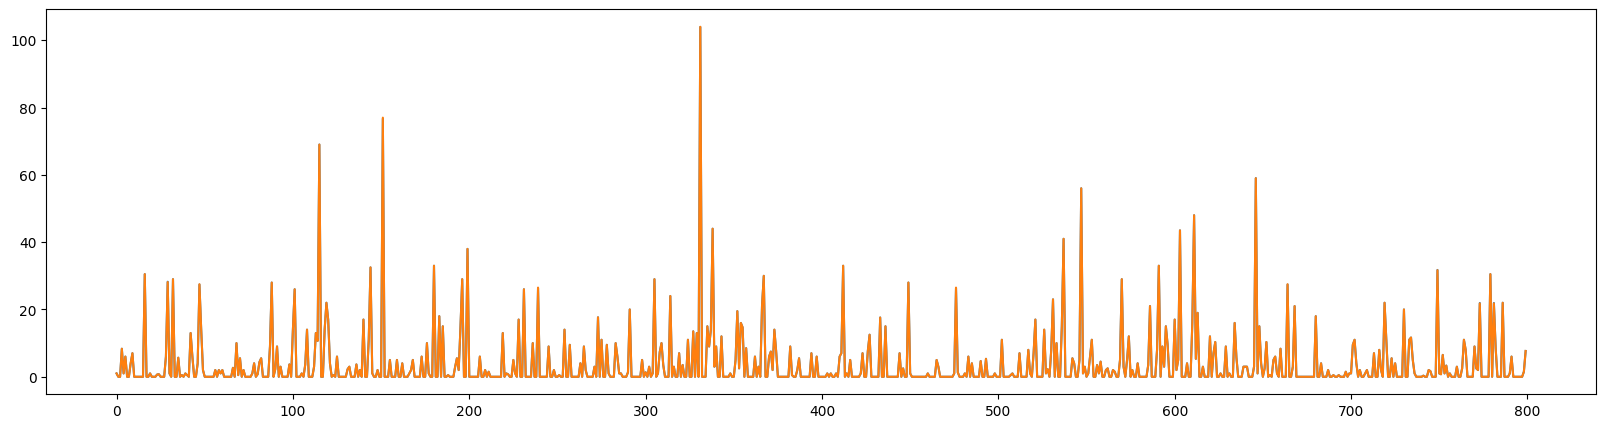

In [46]:
plt.figure(figsize=(20,5))
plt.plot(y_pred.tolist()[1500:2300])
plt.plot(y_test.fillna(0).tolist()[1500:2300])

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

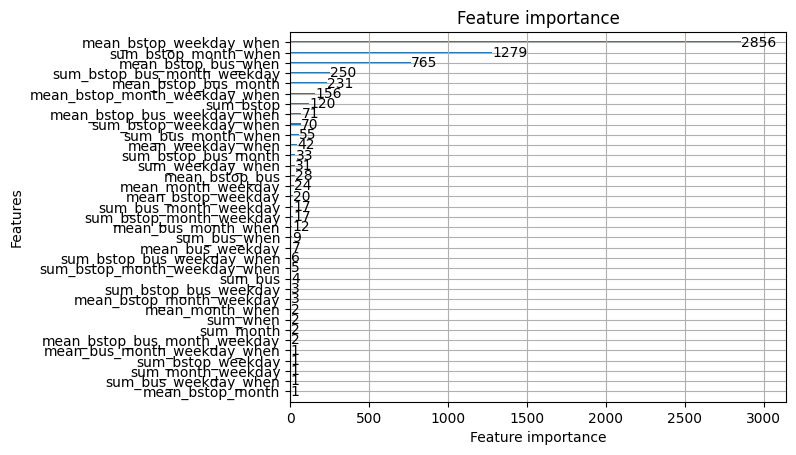

In [47]:
plot_importance(lgbm)

In [16]:
joblib.dump(lgbm, 'C:/Users/user/Desktop/bj/Bbeojung.kr/Web/Model/lgbm_third.pkl')

['C:/Users/user/Desktop/bj/Bbeojung.kr/Web/Model/lgbm_third.pkl']